In [1]:
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

--- 
 
 
# eXtreme Gradient Boosting, check if possible for direct gradient regression

  
> #### We want to see if there is eXtreme Gradient Boosting can improve predictability Score
> If r2 value is good can continue to utilize it for linear coeff
> 
>> Similarly, the data visualized in `cleaned_gen_match_stats.csv` from [2a_comprehensive_data_cleaning_erangel_gen](https://github.com/Gyanroh/SC1015_PUBG_Project/blob/main/2_Cleaning_Data/2_comprehensive_data_cleaning_erangel_gen.ipynb)
>><br>Take a sample of 10000000

In [3]:
erangel_gen = pd.read_csv('cleaned_gen_match_stats.csv')

In [4]:
erangel_gen['normalized_ranking'] = (erangel_gen['normalized_ranking'] * 100).round(3)
erangel_gen.describe().applymap(lambda x: f"{x:0.3f}")

,game_size,party_size,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,normalized_ranking
count,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000
mean,45.773,2.756,0.410,1132.549,1227.639,102.196,0.683,764.021,49.755
std,23.231,1.216,0.647,1869.061,1198.361,121.626,1.120,563.318,28.682
min,24.000,1.000,0.000,0.000,1.000,0.000,0.000,50.405,0.000
25%,27.000,2.000,0.000,0.000,219.673,0.000,0.000,244.813,25.000
50%,43.000,2.000,0.000,0.000,821.483,72.000,0.000,615.374,51.000
75%,50.000,4.000,1.000,1838.660,1986.821,152.000,1.000,1251.628,75.000
max,96.000,4.000,2.000,14974.475,36748.125,3646.000,35.000,2373.716,98.900


In [9]:
erangel_sample = erangel_gen.sample(n = 10000000) 

---


# Train & Test 

>  We use target varible `normalized_ranking`
> <br>We correlate it with `"game_size", "player_kills", "player_survive_time", "player_dmg", "player_dbno", "player_dist_walk", "player_dist_ride"`

In [10]:
#Extract Response and Predictors
y = pd.DataFrame(erangel_sample['normalized_ranking'])
X = pd.DataFrame(erangel_sample[["game_size", "party_size", "player_kills", "player_survive_time", "player_dmg", "player_dbno", "player_dist_walk", "player_dist_ride"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
erang_xgb = xgb.XGBRegressor(objective ='reg:squarederror',tree_method="hist", 
                             eval_metric=mean_squared_error, n_estimators = 20, 
                             seed = 999, max_leaves = 0)
erang_xgb.fit(X_train,y_train.values.ravel())


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x00000210A821E0D0>,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=999, reg_alpha=0, reg_lambda=1, ...)

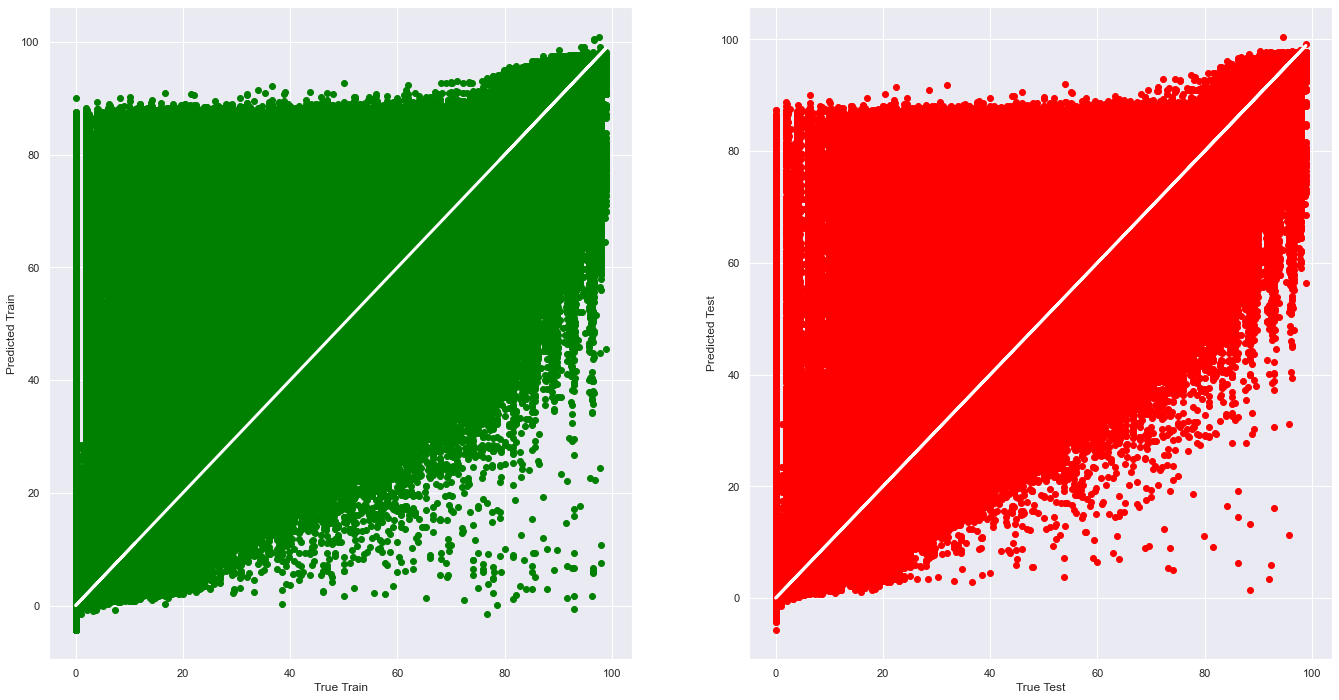

Test Dataset for Erangel_Gen
Mean Squared Error (MSE) 	: 182.85144360257092
Explained Variance (R^2) 	: 0.7777983101129482

Train Dataset for Erangel_Gen
Mean Squared Error (MSE) 	: 182.75844864018777
Explained Variance (R^2) 	: 0.777872481672194


In [12]:
#Predicting 
y_test_pred = erang_xgb.predict(X_test)
y_train_pred = erang_xgb.predict(X_train)

#Plotting
f, axes = plt.subplots(1, 2, figsize=(23, 12))
axes[0].scatter(y_train, y_train_pred, color = "green")
axes[0].plot(y_train, y_train, 'w-', linewidth = 3)
axes[0].set_xlabel("True Train")
axes[0].set_ylabel("Predicted Train")
axes[1].scatter(y_test, y_test_pred, color = "red")
axes[1].plot(y_test, y_test, 'w-', linewidth = 3)
axes[1].set_xlabel("True Test")
axes[1].set_ylabel("Predicted Test")
plt.show()

#Display Test Data
print("Test Dataset for Erangel_Gen")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Explained Variance (R^2) \t:", erang_xgb.score(X_test, y_test))

print()
#Display Train Data
print("Train Dataset for Erangel_Gen")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) \t:", erang_xgb.score(X_train, y_train))



---

# Conclusion

> Regression seems ok. There is some variation but it is due to the random nature of players. Pretty decent. Can proceed to finding coeff-